In [553]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from config import db_password
import psycopg2

In [554]:
conn = psycopg2.connect(host="localhost", port = 5432, database="Group-Project", user="postgres", password=db_password)

In [555]:
cur = conn.cursor()

In [556]:
cur.execute("""SELECT * FROM demographics""")

In [557]:
query_results = cur.fetchall()
print(query_results)

[(0, 'US', 'United States', None, None, None, None, None, '52,373,312', '34,158,051', '11,650,730', '11,717,266', 47.7, 31.1, 10.6, 10.7, '44,535,197', '45,947,035', '20,794,975', '21,558,480', 33.5, 34.6, 15.7, 16.2, '39,343,718', '47,642,763', '39,571,702', '32,310,253', 24.8, 30.0, 24.9, 20.3, '35,715,625', '52,168,981', '49,864,428', '44,462,605', 19.6, 28.6, 27.4, 24.4, '26,472,261', '59,472,748', '63,756,905', '70,920,162', 12.0, 27.0, 28.9, 32.1, None, None, None, None, None, None, None, None, None, '160,611,064', '147,677,360', '12,933,704', 8.1, '65,712', None), (1000, 'AL', 'Alabama', None, None, None, None, None, '1,062,306', '468,269', '136,287', '141,936', 58.7, 25.9, 7.5, 7.8, '964,840', '704,207', '278,205', '270,063', 43.5, 31.8, 12.5, 12.2, '843,638', '749,591', '553,512', '399,228', 33.1, 29.4, 21.7, 15.7, '714,081', '877,216', '746,495', '549,608', 24.7, 30.4, 25.9, 19.0, '458,922', '1,022,839', '993,344', '845,772', 13.8, 30.8, 29.9, 25.5, None, None, None, None, No

In [558]:
demo_raw_df = pd.DataFrame(query_results,columns=["FIPS", 
    "State", 
    "County",
    "2003 Rural-urban Continuum Code", 
    "2003 Urban Influence Code", 
    "2013 Rural-urban Continuum Code", 
    "2013 Urban Influence Code", 
    "City/Suburb/Town/Rural 2013", 
    "Less than HSD(1970)", 
    "High school diploma only(1970)", 
    "Some college (1-3 years)(1970)", 
    "Four or more years of college(1970)", 
    "Percent adults with less than HSD(1970)", 
    "Percent adults with HSD only(1970)", 
    "Percent adults 1-3 years college(1970)", 
    "Percent with four or more years of college(1970)", 
    "Less than HSD(1980)", 
    "HSD only(1980)", 
    "Some college (1-3 years)(1980)", 
    "Four or more years of college (1980)",
    "Percent with less than HSD(1980)", 
    "Percent with HSD only(1980)", 
    "Percent with some college (1-3 years)(1980)", 
    "Percent with four or more years of college(1980)", 
    "Less than HSD(1990)", 
    "HSD only(1990)", 
    "Some college or ASD(1990)", 
    "BS degree or higher(1990)", 
    "Percent with less than HSD(1990)", 
    "Percent with HSD only(1990)", 
    "Percent with some college or ASD(1990)",
    "Percent with a BS degree or higher(1990)", 
    "Less than HSD(2000)", 
    "HSD only(2000)", 
    "Some college or ASD(2000)", 
    "BS degree or higher(2000)", 
    "Percent with less than HSD(2000)", 
    "Percent with HSD only(2000)",
    "Percent completing some college or ASD(2000)", 
    "Percent with BS degree or higher(2000)",
    "Less than HSD(2015-19)", 
    "HSD only(2015-19)", 
    "Some college or ASD(2015-19)", 
    "BS degree or higher 2015-19", 
    "Percent with less than HSD(2015-19)", 
    "Percent with HSD only(2015-19)", 
    "Percent completing some college or ASD(2015-19)",
    "Percent with BS degree or higher(2015-19)",
    "bkey",
    "Population_2010",
    "UIC_2013",
    "Description",
    "City/Suburb/Town/Rural",
    "Rural_urban_continuum_code_2013",
    "Urban_influence_code_2013",
    "Community_Type",
    "Metro_2013",
    "Civilian_labor_force_2020",
    "Employed_2020",
    "Unemployed_2020",
    "Unemployment_rate_2020",
    "Median_Household_Income_2019",
    "Med_HH_Income_Percent_of_State_Total_2019"
])

In [559]:
demo_raw_df.head()

,FIPS,State,County,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(1970),High school diploma only(1970),Some college (1-3 years)(1970),Four or more years of college(1970),Percent adults with less than HSD(1970),Percent adults with HSD only(1970),Percent adults 1-3 years college(1970),Percent with four or more years of college(1970),Less than HSD(1980),HSD only(1980),Some college (1-3 years)(1980),Four or more years of college (1980),Percent with less than HSD(1980),Percent with HSD only(1980),Percent with some college (1-3 years)(1980),Percent with four or more years of college(1980),Less than HSD(1990),HSD only(1990),Some college or ASD(1990),BS degree or higher(1990),Percent with less than HSD(1990),Percent with HSD only(1990),Percent with some college or ASD(1990),Percent with a BS degree or higher(1990),Less than HSD(2000),HSD only(2000),Some college or ASD(2000),BS degree or higher(2000),Percent with less than HSD(2000),Percent with HSD only(2000),Percent completing some college or ASD(2000),Percent with BS degree or higher(2000),Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),bkey,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Community_Type,Metro_2013,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,0,US,United States,NaN,NaN,NaN,NaN,None,"52,373,312","34,158,051","11,650,730","11,717,266",47.7,31.1,10.6,10.7,"44,535,197","45,947,035","20,794,975","21,558,480",33.5,34.6,15.7,16.2,"39,343,718","47,642,763","39,571,702","32,310,253",24.8,30.0,24.9,20.3,"35,715,625","52,168,981","49,864,428","44,462,605",19.6,28.6,27.4,24.4,"26,472,261","59,472,748","63,756,905","70,920,162",12.0,27.0,28.9,32.1,None,None,NaN,None,None,NaN,NaN,None,NaN,"160,611,064","147,677,360","12,933,704",8.1,"65,712",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,None,"1,062,306","468,269","136,287","141,936",58.7,25.9,7.5,7.8,"964,840","704,207","278,205","270,063",43.5,31.8,12.5,12.2,"843,638","749,591","553,512","399,228",33.1,29.4,21.7,15.7,"714,081","877,216","746,495","549,608",24.7,30.4,25.9,19.0,"458,922","1,022,839","993,344","845,772",13.8,30.8,29.9,25.5,None,None,NaN,None,None,NaN,NaN,None,NaN,"2,230,118","2,099,062","131,056",5.9,"51,771",100.0
2,1001,AL,Autauga,2.0,2.0,2.0,2.0,City,"6,611","3,757",933,767,54.8,31.1,7.7,6.4,"7,074","6,145","2,104","2,117",40.6,35.2,12.1,12.1,"6,252","6,671","4,912","3,026",30.0,32.0,23.5,14.5,"5,872","9,332","7,413","4,972",21.3,33.8,26.9,18.0,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,Autauga AL,"54,571",2.0,Small-in a metro area with fewer than 1 millio...,City,2.0,2.0,City,1.0,"25,838","24,576","1,262",4.9,"58,233",112.5
3,1003,AL,Baldwin,4.0,5.0,3.0,2.0,City,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,6.5,"18,125","15,380","6,602","5,498",39.7,33.7,14.5,12.1,"17,309","20,544","15,900","10,870",26.8,31.8,24.6,16.8,"17,258","28,428","28,178","22,146",18.0,29.6,29.3,23.1,"13,893","41,797","47,274","48,148",9.2,27.7,31.3,31.9,Baldwin AL,"182,265",2.0,Small-in a metro area with fewer than 1 millio...,City,3.0,2.0,City,1.0,"96,763","91,338","5,425",5.6,"59,871",115.6
4,1005,AL,Barbour,6.0,6.0,6.0,6.0,Town,"8,120","2,242",581,861,68.8,19.0,4.9,7.3,"7,759","3,671","1,362","1,300",55.1,26.1,9.7,9.2,"6,965","4,258","2,622","1,857",44.4,27.1,16.7,11.8,"6,679","6,124","4,025","2,068",35.3,32.4,21.3,10.9,"4,812","6,396","4,676","2,080",26.8,35.6,26.0,11.6,Barbour AL,"27,457",6.0,Noncore adjacent to a small metro with town of...,Town,6.0,6.0,Town,0.0,"8,587","7,982",605,7.0,"35,972",69.5


In [560]:
demo_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 63 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   FIPS                                              3283 non-null   int64  
 1   State                                             3283 non-null   object 
 2   County                                            3283 non-null   object 
 3   2003 Rural-urban Continuum Code                   3221 non-null   float64
 4   2003 Urban Influence Code                         3221 non-null   float64
 5   2013 Rural-urban Continuum Code                   3221 non-null   float64
 6   2013 Urban Influence Code                         3221 non-null   float64
 7   City/Suburb/Town/Rural 2013                       3221 non-null   object 
 8   Less than HSD(1970)                               3186 non-null   object 
 9   High school diploma

In [561]:
# Read in the data for brewery listings and create a Pandas DataFrame.
# Loading data
file_path = "../Resources/data/brewery_listing.csv" 
brewery_list_df= pd.read_csv(file_path)
brewery_list_df.head()

,key,Name,Address,City,ST,Zip,County,Website,Phone,Type,New_Revised,Updated,FIPS
0,Anchorage AK,49th State Brewing Co Anchorage,717 W 3rd Ave,Anchorage,AK,99501,Anchorage,49statebrewing.com/anchorage/,907-277 7727,BP,NaN,NaN,2020
1,Anchorage AK,Anchorage Brewing Co,148 W 91st Ave,Anchorage,AK,99515,Anchorage,anchoragebrewingcompany.com/,907-360-5104,BC/TR,NaN,NaN,2020
2,Anchorage AK,Broken Tooth Brewing Co,2021 Spar Ave,Anchorage,AK,99501,Anchorage,brokentoothbrewing.net/,907-278-4999,BC,NaN,NaN,2020
3,Anchorage AK,Cynosure Brewing Co,144 E Potter Dr - Unit E,Anchorage,AK,99518,Anchorage,www.facebook.com/CynosureBrewing,907-563-2966,BC/TR,NaN,NaN,2020
4,Anchorage AK,Glacier Brewhouse,737 W 5th Ave,Anchorage,AK,99501,Anchorage,www.glacierbrewhouse.com/,907-274-2739,BP,NaN,NaN,2020


In [562]:
brewery_count_df=pd.pivot_table(brewery_list_df,index='FIPS',aggfunc='count')
brewery_count_df.head()

,Address,City,County,Name,New_Revised,Phone,ST,Type,Updated,Website,Zip,key
FIPS,,,,,,,,,,,,
1003,3,3,3,3,0,3,3,3,0,3,3,3
1015,1,1,1,1,0,1,1,1,0,1,1,1
1043,1,1,1,1,0,1,1,1,0,1,1,1
1055,1,1,1,1,0,1,1,1,0,1,1,1
1069,1,1,1,1,0,1,1,1,0,1,1,1


In [563]:
brewery_count_df=brewery_count_df.rename(columns={'Address':'Brewery_Count'})
brewery_count_df.head()

,Brewery_Count,City,County,Name,New_Revised,Phone,ST,Type,Updated,Website,Zip,key
FIPS,,,,,,,,,,,,
1003,3,3,3,3,0,3,3,3,0,3,3,3
1015,1,1,1,1,0,1,1,1,0,1,1,1
1043,1,1,1,1,0,1,1,1,0,1,1,1
1055,1,1,1,1,0,1,1,1,0,1,1,1
1069,1,1,1,1,0,1,1,1,0,1,1,1


In [564]:
remove=[1,2,3,4,5,6,7,8,9,10,11]

In [565]:
brewery_count_df=brewery_count_df.drop(brewery_count_df.columns[remove],axis=1)
brewery_count_df.head()

,Brewery_Count
FIPS,
1003,3
1015,1
1043,1
1055,1
1069,1


In [569]:
pd.set_option('display.max_columns', None)

In [570]:
demographics_df.describe()


,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
count,3123.000000,3123.000000,3123.000000,3123.000000,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3.123000e+03,3123.000000,3123.000000,3123.000000
mean,30476.618636,4.999680,5.254243,1.548831,8.470171e+03,1.903016e+04,2.040009e+04,2.269283e+04,13.057349,34.162312,30.815786,21.966282,4.999680,5.254243,0.371758,5.139124e+04,6.726705,55657.632405,89.466411
std,15083.203599,2.702468,3.488341,1.272246,3.673363e+04,5.115088e+04,6.118040e+04,8.235959e+04,6.260141,7.221325,5.214638,9.554495,2.702468,3.488341,0.483352,1.661893e+05,2.250591,14425.507766,19.817422
min,1001.000000,1.000000,1.000000,0.000000,4.000000e+00,1.400000e+01,2.000000e+01,0.000000e+00,1.100000,7.300000,5.200000,0.000000,1.000000,1.000000,0.000000,1.840000e+02,1.700000,24732.000000,39.900000
25%,19012.000000,2.000000,2.000000,0.000000,9.805000e+02,2.804000e+03,2.321000e+03,1.244500e+03,8.500000,29.700000,27.300000,15.350000,2.000000,2.000000,0.000000,4.851000e+03,5.200000,46228.500000,76.450000
50%,29185.000000,6.000000,5.000000,1.000000,2.418000e+03,6.520000e+03,5.385000e+03,3.261000e+03,11.700000,34.500000,30.800000,19.600000,6.000000,5.000000,0.000000,1.164200e+04,6.500000,53306.000000,86.800000
75%,45082.000000,7.000000,8.000000,3.000000,5.648500e+03,1.530100e+04,1.462700e+04,1.073050e+04,16.650000,39.100000,34.200000,26.000000,7.000000,8.000000,1.000000,3.156150e+04,8.000000,61885.500000,99.400000
max,56045.000000,9.000000,12.000000,3.000000,1.437059e+06,1.419449e+06,1.789308e+06,2.241079e+06,73.600000,57.400000,60.600000,77.600000,9.000000,12.000000,1.000000,4.921499e+06,22.500000,151806.000000,234.500000


In [571]:
demographics_df.isnull().sum().sum()

0

In [572]:
demographics_df.head()

,FIPS,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
2,1001,AL,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5
3,1003,AL,3.0,2.0,3,13893,41797,47274,48148,9.2,27.7,31.3,31.9,3.0,2.0,1.0,96763,5.6,59871,115.6
4,1005,AL,6.0,6.0,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,6.0,6.0,0.0,8587,7.0,35972,69.5
5,1007,AL,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6
6,1009,AL,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2


In [573]:
demographics_df=demo_raw_df.dropna(axis = 0, how = 'any')

In [574]:
demographics_df.isnull().sum().sum()

0

In [575]:
demographics_df.head()

,FIPS,State,County,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(1970),High school diploma only(1970),Some college (1-3 years)(1970),Four or more years of college(1970),Percent adults with less than HSD(1970),Percent adults with HSD only(1970),Percent adults 1-3 years college(1970),Percent with four or more years of college(1970),Less than HSD(1980),HSD only(1980),Some college (1-3 years)(1980),Four or more years of college (1980),Percent with less than HSD(1980),Percent with HSD only(1980),Percent with some college (1-3 years)(1980),Percent with four or more years of college(1980),Less than HSD(1990),HSD only(1990),Some college or ASD(1990),BS degree or higher(1990),Percent with less than HSD(1990),Percent with HSD only(1990),Percent with some college or ASD(1990),Percent with a BS degree or higher(1990),Less than HSD(2000),HSD only(2000),Some college or ASD(2000),BS degree or higher(2000),Percent with less than HSD(2000),Percent with HSD only(2000),Percent completing some college or ASD(2000),Percent with BS degree or higher(2000),Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),bkey,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Community_Type,Metro_2013,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
2,1001,AL,Autauga,2.0,2.0,2.0,2.0,City,"6,611","3,757",933,767,54.8,31.1,7.7,6.4,"7,074","6,145","2,104","2,117",40.6,35.2,12.1,12.1,"6,252","6,671","4,912","3,026",30.0,32.0,23.5,14.5,"5,872","9,332","7,413","4,972",21.3,33.8,26.9,18.0,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,Autauga AL,"54,571",2.0,Small-in a metro area with fewer than 1 millio...,City,2.0,2.0,City,1.0,"25,838","24,576","1,262",4.9,"58,233",112.5
3,1003,AL,Baldwin,4.0,5.0,3.0,2.0,City,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,6.5,"18,125","15,380","6,602","5,498",39.7,33.7,14.5,12.1,"17,309","20,544","15,900","10,870",26.8,31.8,24.6,16.8,"17,258","28,428","28,178","22,146",18.0,29.6,29.3,23.1,"13,893","41,797","47,274","48,148",9.2,27.7,31.3,31.9,Baldwin AL,"182,265",2.0,Small-in a metro area with fewer than 1 millio...,City,3.0,2.0,City,1.0,"96,763","91,338","5,425",5.6,"59,871",115.6
4,1005,AL,Barbour,6.0,6.0,6.0,6.0,Town,"8,120","2,242",581,861,68.8,19.0,4.9,7.3,"7,759","3,671","1,362","1,300",55.1,26.1,9.7,9.2,"6,965","4,258","2,622","1,857",44.4,27.1,16.7,11.8,"6,679","6,124","4,025","2,068",35.3,32.4,21.3,10.9,"4,812","6,396","4,676","2,080",26.8,35.6,26.0,11.6,Barbour AL,"27,457",6.0,Noncore adjacent to a small metro with town of...,Town,6.0,6.0,Town,0.0,"8,587","7,982",605,7.0,"35,972",69.5
5,1007,AL,Bibb,1.0,1.0,1.0,1.0,City,"5,272","1,402",238,302,73.1,19.4,3.3,4.2,"5,254","2,611",536,433,59.5,29.6,6.1,4.9,"4,850","3,407","1,332",476,48.2,33.8,13.2,4.7,"4,984","4,838","2,756",962,36.8,35.7,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4,Bibb AL,"22,915",1.0,Large-in a metro area with at least 1 million ...,City,1.0,1.0,City,1.0,"8,640","8,067",573,6.6,"47,918",92.6
6,1009,AL,Blount,1.0,1.0,1.0,1.0,City,"10,677","3,440",626,404,70.5,22.7,4.1,2.7,"11,666","7,011","1,819","1,144",53.9,32.4,8.4,5.3,"9,960","8,763","4,745","1,773",39.5,34.7,18.8,7.0,"9,960","12,136","8,371","3,235",29.6,36.0,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1,Blount AL,"57,322",1.0,Large-in a metro area with at least 1 million ...,City,1.0,1.0,City,1.0,"24,661","23,653","1,008",4.1,"52,902",102.2


In [576]:
cols=[2,
3,
4,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
48,
49,
50,
51,
58,
59
]
demographics_df=demographics_df.drop(demographics_df.columns[cols],axis=1)
demographics_df.head()

#droprange = list(range(6,88))
#unemployment_df.drop(unemployment_df.columns[droprange],axis = 1,inplace=True)

,FIPS,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),City/Suburb/Town/Rural,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Community_Type,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
2,1001,AL,2.0,2.0,City,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6,City,2.0,2.0,City,1.0,"25,838",4.9,"58,233",112.5
3,1003,AL,3.0,2.0,City,"13,893","41,797","47,274","48,148",9.2,27.7,31.3,31.9,City,3.0,2.0,City,1.0,"96,763",5.6,"59,871",115.6
4,1005,AL,6.0,6.0,Town,"4,812","6,396","4,676","2,080",26.8,35.6,26.0,11.6,Town,6.0,6.0,Town,0.0,"8,587",7.0,"35,972",69.5
5,1007,AL,1.0,1.0,City,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4,City,1.0,1.0,City,1.0,"8,640",6.6,"47,918",92.6
6,1009,AL,1.0,1.0,City,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1,City,1.0,1.0,City,1.0,"24,661",4.1,"52,902",102.2


In [577]:
demographics_df.columns

Index(['FIPS', 'State', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'City/Suburb/Town/Rural 2013',
       'Less than HSD(2015-19)', 'HSD only(2015-19)',
       'Some college or ASD(2015-19)', 'BS degree or higher 2015-19',
       'Percent with less than HSD(2015-19)', 'Percent with HSD only(2015-19)',
       'Percent completing some college or ASD(2015-19)',
       'Percent with BS degree or higher(2015-19)', 'City/Suburb/Town/Rural',
       'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Community_Type', 'Metro_2013', 'Civilian_labor_force_2020',
       'Unemployment_rate_2020', 'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

In [578]:
comma_col=('Less than HSD(2015-19)','HSD only(2015-19)','Some college or ASD(2015-19)', 'BS degree or higher 2015-19','Civilian_labor_force_2020','Median_Household_Income_2019')

In [579]:
def cleancomma(column_name):
    demographics_df[column_name]=demographics_df[column_name].str.replace(",","").astype('int64')

for col in comma_col:    
    cleancomma(col)

demographics_df.head()


#county_merge_df['Employed_2020']=county_merge_df['Employed_2020'].str.replace(",","").astype('int64')
#county_merge_df['Median_Household_Income_2019']=county_merge_df['Median_Household_Income_2019'].str.replace(",","").astype('int64')
#county_merge_df['Unemployed_2020']=county_merge_df['Unemployed_2020'].str.replace(",","").astype('int64')

,FIPS,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),City/Suburb/Town/Rural,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Community_Type,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
2,1001,AL,2.0,2.0,City,4291,12551,10596,9929,11.5,33.6,28.4,26.6,City,2.0,2.0,City,1.0,25838,4.9,58233,112.5
3,1003,AL,3.0,2.0,City,13893,41797,47274,48148,9.2,27.7,31.3,31.9,City,3.0,2.0,City,1.0,96763,5.6,59871,115.6
4,1005,AL,6.0,6.0,Town,4812,6396,4676,2080,26.8,35.6,26.0,11.6,Town,6.0,6.0,Town,0.0,8587,7.0,35972,69.5
5,1007,AL,1.0,1.0,City,3386,7256,3848,1678,20.9,44.9,23.8,10.4,City,1.0,1.0,City,1.0,8640,6.6,47918,92.6
6,1009,AL,1.0,1.0,City,7763,13299,13519,5210,19.5,33.4,34.0,13.1,City,1.0,1.0,City,1.0,24661,4.1,52902,102.2


In [580]:
demographics_df.drop(['City/Suburb/Town/Rural','Community_Type'],axis=1,inplace=True)

In [581]:
demographics_df['City/Suburb/Town/Rural 2013'].value_counts()

City      1161
Rural      979
Town       612
Suburb     371
Name: City/Suburb/Town/Rural 2013, dtype: int64

In [582]:
comm_type=['Rural','Town','Suburb','City']

def self_encoder(input):
    return comm_type.index(input)


demographics_df['City/Suburb/Town/Rural 2013']=demographics_df['City/Suburb/Town/Rural 2013'].apply(self_encoder)
demographics_df.head()

,FIPS,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
2,1001,AL,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5
3,1003,AL,3.0,2.0,3,13893,41797,47274,48148,9.2,27.7,31.3,31.9,3.0,2.0,1.0,96763,5.6,59871,115.6
4,1005,AL,6.0,6.0,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,6.0,6.0,0.0,8587,7.0,35972,69.5
5,1007,AL,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6
6,1009,AL,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2


In [583]:
model_demo_df=demographics_df.drop(['State'],axis=1)
model_demo_df.head()

,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
2,1001,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5
3,1003,3.0,2.0,3,13893,41797,47274,48148,9.2,27.7,31.3,31.9,3.0,2.0,1.0,96763,5.6,59871,115.6
4,1005,6.0,6.0,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,6.0,6.0,0.0,8587,7.0,35972,69.5
5,1007,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6
6,1009,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2


In [584]:
cols_used=model_demo_df.columns
cols_used=cols_used[1:22]
cols_used

Index(['2013 Rural-urban Continuum Code', '2013 Urban Influence Code',
       'City/Suburb/Town/Rural 2013', 'Less than HSD(2015-19)',
       'HSD only(2015-19)', 'Some college or ASD(2015-19)',
       'BS degree or higher 2015-19', 'Percent with less than HSD(2015-19)',
       'Percent with HSD only(2015-19)',
       'Percent completing some college or ASD(2015-19)',
       'Percent with BS degree or higher(2015-19)',
       'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Metro_2013', 'Civilian_labor_force_2020', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

In [585]:
X=model_demo_df[cols_used].copy()

In [586]:
len(X.columns)

18

In [587]:
#X['State']=LabelEncoder().fit_transform(X['State'])
#X.head()


In [588]:
X_scaled=MinMaxScaler().fit_transform(X)
X_scaled

array([[0.125     , 0.09090909, 1.        , ..., 0.15384615, 0.26363379,
        0.37307297],
       [0.25      , 0.09090909, 1.        , ..., 0.1875    , 0.27652392,
        0.38900308],
       [0.625     , 0.45454545, 0.33333333, ..., 0.25480769, 0.0884524 ,
        0.15210689],
       ...,
       [0.75      , 0.63636364, 0.33333333, ..., 0.22115385, 0.36218267,
        0.34480987],
       [0.75      , 0.90909091, 0.        , ..., 0.17307692, 0.23915199,
        0.22302158],
       [0.75      , 0.72727273, 0.        , ..., 0.10576923, 0.27289611,
        0.25642343]])

C:\Users\erict\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  f"KMeans is known to have a memory leak on Windows "


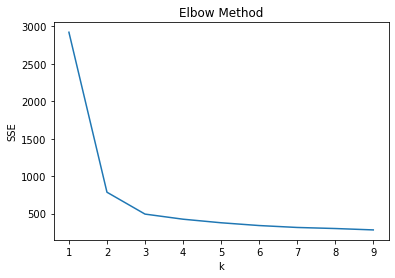

In [589]:
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [590]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

In [591]:
y_pred=model.predict(X_scaled)
print(y_pred)

[1 1 0 ... 2 2 2]


In [592]:
df_y=pd.DataFrame(y_pred,columns=['Cluster'])
df_y.head()

,Cluster
0,1
1,1
2,0
3,1
4,1


In [593]:
county_cluster_df=model_demo_df.join(df_y,how='inner')
county_cluster_df.head()

,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
2,1001,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5,0
3,1003,3.0,2.0,3,13893,41797,47274,48148,9.2,27.7,31.3,31.9,3.0,2.0,1.0,96763,5.6,59871,115.6,1
4,1005,6.0,6.0,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,6.0,6.0,0.0,8587,7.0,35972,69.5,1
5,1007,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6,0
6,1009,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2,0


In [594]:
county_cluster_df.describe()

,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
count,3043.000000,3043.000000,3043.000000,3043.000000,3.043000e+03,3.043000e+03,3.043000e+03,3.043000e+03,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3.043000e+03,3043.000000,3043.000000,3043.000000,3043.000000
mean,29822.562274,4.990470,5.238580,1.552087,8.601506e+03,1.917202e+04,2.056601e+04,2.296293e+04,13.195301,34.163161,30.734998,21.908150,4.990470,5.238580,0.373973,5.186703e+04,6.737430,55485.529740,89.293099,1.007230
std,14723.312592,2.709149,3.487594,1.273884,3.717983e+04,5.168951e+04,6.185866e+04,8.331196e+04,6.272440,7.244959,5.230281,9.583997,2.709149,3.487594,0.483936,1.680658e+05,2.260582,14476.229993,19.880921,0.793183
min,1001.000000,1.000000,1.000000,0.000000,4.000000e+00,1.400000e+01,2.000000e+01,0.000000e+00,1.100000,7.300000,5.200000,0.000000,1.000000,1.000000,0.000000,1.840000e+02,1.700000,24732.000000,39.900000,0.000000
25%,18156.000000,2.000000,2.000000,0.000000,9.920000e+02,2.796500e+03,2.300000e+03,1.228000e+03,8.600000,29.700000,27.200000,15.200000,2.000000,2.000000,0.000000,4.832000e+03,5.200000,46065.500000,76.150000,0.000000
50%,29105.000000,6.000000,5.000000,1.000000,2.439000e+03,6.493000e+03,5.326000e+03,3.223000e+03,11.900000,34.500000,30.700000,19.500000,6.000000,5.000000,0.000000,1.152500e+04,6.500000,53108.000000,86.500000,1.000000
75%,42106.000000,7.000000,8.000000,3.000000,5.738500e+03,1.536500e+04,1.461800e+04,1.058650e+04,16.800000,39.100000,34.200000,26.000000,7.000000,8.000000,1.000000,3.150800e+04,8.100000,61756.000000,99.300000,2.000000
max,55029.000000,9.000000,12.000000,3.000000,1.437059e+06,1.419449e+06,1.789308e+06,2.241079e+06,73.600000,57.400000,60.600000,77.600000,9.000000,12.000000,1.000000,4.921499e+06,22.500000,151806.000000,234.500000,2.000000


In [595]:
county_cluster_df['Cluster'].value_counts()

1    1129
2     968
0     946
Name: Cluster, dtype: int64

In [596]:
county_cluster_df=pd.merge(county_cluster_df,demographics_df[['FIPS','State']],on='FIPS',how='left')
county_cluster_df.head()

,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster,State
0,1001,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5,0,AL
1,1003,3.0,2.0,3,13893,41797,47274,48148,9.2,27.7,31.3,31.9,3.0,2.0,1.0,96763,5.6,59871,115.6,1,AL
2,1005,6.0,6.0,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,6.0,6.0,0.0,8587,7.0,35972,69.5,1,AL
3,1007,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6,0,AL
4,1009,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2,0,AL


In [598]:
county_cluster_df=pd.merge(county_cluster_df,brewery_count_df[['Brewery_Count']],on='FIPS',how='left')

In [599]:
county_cluster_df.head()

,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster,State,Brewery_Count
0,1001,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5,0,AL,NaN
1,1003,3.0,2.0,3,13893,41797,47274,48148,9.2,27.7,31.3,31.9,3.0,2.0,1.0,96763,5.6,59871,115.6,1,AL,3.0
2,1005,6.0,6.0,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,6.0,6.0,0.0,8587,7.0,35972,69.5,1,AL,NaN
3,1007,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6,0,AL,NaN
4,1009,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2,0,AL,NaN


In [600]:
county_cluster_df['Brewery_Count']=county_cluster_df['Brewery_Count'].fillna(0)

In [601]:
county_cluster_df.head()

,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster,State,Brewery_Count
0,1001,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5,0,AL,0.0
1,1003,3.0,2.0,3,13893,41797,47274,48148,9.2,27.7,31.3,31.9,3.0,2.0,1.0,96763,5.6,59871,115.6,1,AL,3.0
2,1005,6.0,6.0,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,6.0,6.0,0.0,8587,7.0,35972,69.5,1,AL,0.0
3,1007,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6,0,AL,0.0
4,1009,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2,0,AL,0.0


In [602]:
county_cluster0_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==0)]
county_cluster0_df.head()

,FIPS,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,Less than HSD(2015-19),HSD only(2015-19),Some college or ASD(2015-19),BS degree or higher 2015-19,Percent with less than HSD(2015-19),Percent with HSD only(2015-19),Percent completing some college or ASD(2015-19),Percent with BS degree or higher(2015-19),Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster,State,Brewery_Count
0,1001,2.0,2.0,3,4291,12551,10596,9929,11.5,33.6,28.4,26.6,2.0,2.0,1.0,25838,4.9,58233,112.5,0,AL,0.0
3,1007,1.0,1.0,3,3386,7256,3848,1678,20.9,44.9,23.8,10.4,1.0,1.0,1.0,8640,6.6,47918,92.6,0,AL,0.0
4,1009,1.0,1.0,3,7763,13299,13519,5210,19.5,33.4,34.0,13.1,1.0,1.0,1.0,24661,4.1,52902,102.2,0,AL,0.0
6,1013,6.0,6.0,1,2066,6244,3279,2230,15.0,45.2,23.7,16.1,6.0,6.0,0.0,9056,8.8,39944,77.2,0,AL,0.0
7,1015,3.0,2.0,3,12315,25940,26233,14620,15.6,32.8,33.2,18.5,3.0,2.0,1.0,46240,7.1,47747,92.2,0,AL,1.0


In [603]:
county_cluster1_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==1)]

In [604]:
county_cluster2_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==2)]

In [605]:
county_cluster3_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==3)]

In [606]:
output_data_file = "../../../cluster0.csv"

In [607]:
county_cluster0_df.to_csv(output_data_file)

In [608]:
output_data_file = "../../../cluster1.csv"

In [609]:
county_cluster1_df.to_csv(output_data_file)

In [610]:
output_data_file = "../../../cluster2.csv"

In [611]:
county_cluster2_df.to_csv(output_data_file)